In [1]:
#Importar as bibliotecas necessárias

import pandas as pd
#print('Pandas version: ', pd.__version__)

import numpy as np
#print('Numpy version: ', np.__version__)

import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix

#import helper

In [2]:
# Importar o dataset de filmes
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Importar o dataset de avaliações
ratings = pd.read_csv('ratings.csv', usecols = ['userId', 'movieId','rating'])
print('Shape of ratings dataset is: ',ratings.shape, '\n')
print('Max values in dataset are \n',ratings.max(), '\n')
print('Min values in dataset are \n',ratings.min(), '\n') 
ratings.head()

Shape of ratings dataset is:  (25000095, 3) 

Max values in dataset are 
 userId     162541.0
movieId    209171.0
rating          5.0
dtype: float64 

Min values in dataset are 
 userId     1.0
movieId    1.0
rating     0.5
dtype: float64 



,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [4]:
print('O dataset contém ', len(ratings), ' avaliações de ', len(movies), ' filmes.')

O dataset contém  25000095  avaliações de  62423  filmes.


In [12]:
#movies_list = np.unique(ratings['movieId'])[:200]
#ratings = ratings.loc[ratings['movieId'].isin(movies_list)]
#print('Shape of ratings dataset is: ',ratings.shape, '\n')
#print('Max values in dataset are \n',ratings.max(), '\n')
#print('Min values in dataset are \n',ratings.min(), '\n')

In [13]:
# Filtrando para filmes com nota superior a 3
#ratings = ratings[ratings['rating'] >= 3.0]
#print('Shape of ratings dataset is: ',ratings.shape, '\n')
#print('Max values in dataset are \n',ratings.max(), '\n')
#print('Min values in dataset are \n',ratings.min(), '\n')
#ratings.head()

In [14]:
#print('O dataset contém ', len(ratings), ' avaliações de ', len(movies_list), ' filmes.')

In [5]:
# Função para obter o gênero e suas avaliações 
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
        
    genre_ratings.columns = column_names
    return genre_ratings

# Calcular a média das avaliações
genre_ratings = get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
1,4.17,3.70
2,3.16,4.02
3,3.53,3.70
4,3.45,3.16
5,3.55,4.09


In [6]:
# Function to get the biased dataset
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset = genre_ratings[((genre_ratings['avg_romance_rating'] < score_limit_1) & (genre_ratings['avg_scifi_rating'] > score_limit_2)) | ((genre_ratings['avg_scifi_rating'] < score_limit_1) & (genre_ratings['avg_romance_rating'] > score_limit_2))]
    
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
    
    # Converte o DataFrame para uma NumPy matriz de registro
    biased_dataset = pd.DataFrame(biased_dataset.to_records())
    return biased_dataset

# Bias the dataset
biased_dataset = bias_genre_rating_dataset(genre_ratings, 3, 2.5)

# Printing the resulting number of records & the head of the dataset
print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  302


,index,avg_romance_rating,avg_scifi_rating
0,30,2.70,4.21
1,31,2.53,2.03
2,34,2.75,2.60
3,38,3.53,2.93
4,52,4.12,2.83


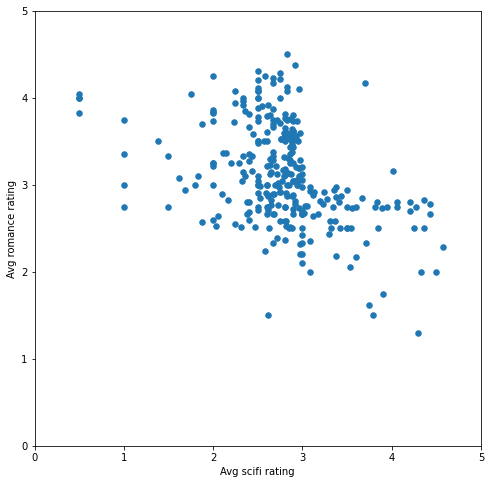

In [19]:
# Defining the scatterplot drawing function
def draw_scatterplot(x_data, x_label, y_data, y_label):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x_data, y_data, s=30)
    
# Plot the scatterplot
draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')

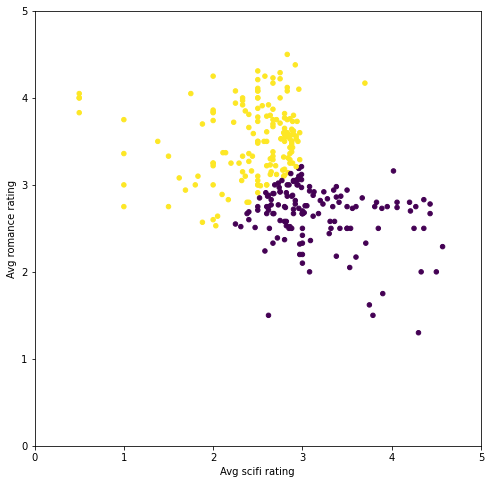

In [7]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values
# Import KMeans
from sklearn.cluster import KMeans
# Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)
# Defining the cluster plotting function
def draw_clusters(biased_dataset, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg romance rating')
    clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    plt.scatter(clustered['avg_scifi_rating'], clustered['avg_romance_rating'], c=clustered['group'], s=20, cmap=cmap)
# Plot
draw_clusters(biased_dataset, predictions)

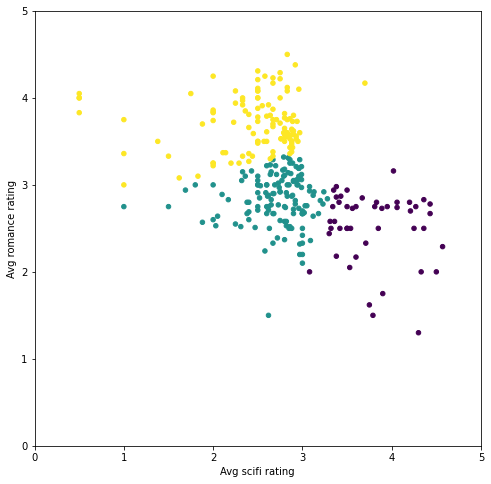

In [8]:
# Create an instance of KMeans to find three clusters
kmeans_2 = KMeans(n_clusters=3)
# Use fit_predict to cluster the dataset
predictions_2 = kmeans_2.fit_predict(X)
# Plot
draw_clusters(biased_dataset, predictions_2)

In [22]:
import helper

ModuleNotFoundError: No module named 'grp'

In [21]:
# Selecionar o dataset 
df = biased_dataset[['avg_scifi_rating','avg_romance_rating']]

# Escolher a faixa de valores de k a ser analisada
# We added a stride of 5 to improve performance. We don't need to calculate the error for every k value
possible_k_values = range(2, len(X)+1, 5)
# Define function to calculate the clustering errors
def clustering_errors(k, data):
    kmeans = KMeans(n_clusters=k).fit(data)
    predictions = kmeans.predict(data)
    #cluster_centers = kmeans.cluster_centers_
    # errors = [mean_squared_error(row, cluster_centers[cluster]) for row, cluster in zip(data.values, predictions)]
    # return sum(errors)
    silhouette_avg = silhouette_score(data, predictions)
    return silhouette_avg
# Calculate error values for all k values we're interested in
errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values]
# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(possible_k_values, errors_per_k)
# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

NameError: name 'helper' is not defined

In [10]:
# Merge the two tables then pivot so we have Users X Movies dataframe
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on = 'movieId')
print('Shape of ratings tittle dataset is: ',ratings_title.shape, '\n')
ratings_title.head()

Shape of ratings tittle dataset is:  (25000095, 4) 



,userId,movieId,rating,title
0,1,296,5.0,Pulp Fiction (1994)
1,3,296,5.0,Pulp Fiction (1994)
2,4,296,4.0,Pulp Fiction (1994)
3,5,296,4.0,Pulp Fiction (1994)
4,7,296,4.0,Pulp Fiction (1994)


In [11]:
most_rated_films = ratings_title.groupby('title')['rating'].count().sort_values(ascending=False)
print(most_rated_films[:20])

title
Forrest Gump (1994)                                                               81491
Shawshank Redemption, The (1994)                                                  81482
Pulp Fiction (1994)                                                               79672
Silence of the Lambs, The (1991)                                                  74127
Matrix, The (1999)                                                                72674
Star Wars: Episode IV - A New Hope (1977)                                         68717
Jurassic Park (1993)                                                              64144
Schindler's List (1993)                                                           60411
Braveheart (1995)                                                                 59184
Fight Club (1999)                                                                 58773
Terminator 2: Judgment Day (1991)                                                 57379
Star Wars: Episode V - The

In [74]:
most_rated_users = ratings_title.groupby('userId')['rating'].count().sort_values(ascending=False)
print(most_rated_users.shape)
print(most_rated_users[:20])

(162541,)
userId
72315     32202
80974      9178
137293     8913
33844      7919
20055      7488
109731     6647
92046      6564
49403      6553
30879      5693
115102     5649
110971     5633
75309      5525
78849      5276
61010      5244
29803      5219
122011     5160
57548      5066
93855      5045
103611     4861
34987      4831
Name: rating, dtype: int64


In [125]:
# Create a spreadsheet-style pivot table as a DataFrame.
user_movie_ratings = pd.pivot_table(ratings_title[:20000000], index = 'userId', columns = 'title', values = 'rating')

MemoryError: Unable to allocate 153. MiB for an array with shape (1, 20000000) and data type int64

In [14]:
# Print the number of dimensions and a subset of the dataset
print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]
#user_movie_ratings.head()

dataset dimensions:  (162537, 3219) 

Subset example:


title,$5 a Day (2008),'Round Midnight (1986),"'burbs, The (1989)",(500) Days of Summer (2009),...And Justice for All (1979),10 (1979),10 Rillington Place (1971),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
most_rated = user_movie_ratings.loc[ratings['userId'].isin(most_rated_users)]
print(most_rated.shape)
most_rated.head()

(158003, 3219)


title,$5 a Day (2008),'Round Midnight (1986),"'burbs, The (1989)",(500) Days of Summer (2009),...And Justice for All (1979),10 (1979),10 Rillington Place (1971),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),...,Your Friends and Neighbors (1998),Z (1969),Zack and Miri Make a Porno (2008),Zero Effect (1998),Zombieland (2009),Zoolander (2001),Zootopia (2016),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
3661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3665,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN


In [106]:
# Define Function to get the most rated movies
def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    # 1- Count
    user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
    # 2- sort
    user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings)-1, axis=1, ascending=False)
    user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)
    # 3- slice
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies

In [107]:
# Define the sorting by rating function
def sort_by_rating_density(user_movie_ratings, n_movies):
    most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
    return most_rated_movies

In [108]:
# choose the number of movies and users and sort
n_movies = 30

In [116]:
most_rated_movies_users_selection = sort_by_rating_density(user_movie_ratings, n_movies)

In [117]:
print(most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()

(162537, 30)


title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Schindler's List (1993),Braveheart (1995),Fight Club (1999),...,"Lord of the Rings: The Return of the King, The (2003)",Seven (a.k.a. Se7en) (1995),"Fugitive, The (1993)",Back to the Future (1985),Independence Day (a.k.a. ID4) (1996),Apollo 13 (1995),Fargo (1996),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Saving Private Ryan (1998),"Sixth Sense, The (1999)"
0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.5,5.0,NaN,NaN,5.0,5.0,2.0,5.0,5.0,NaN,...,5.0,NaN,5.0,4.0,NaN,4.0,NaN,NaN,4.0,4.0
2,4.0,4.0,5.0,4.0,4.0,4.0,2.0,4.0,NaN,5.0,...,4.0,NaN,NaN,3.5,3.5,NaN,NaN,4.5,NaN,NaN
3,NaN,NaN,4.0,NaN,4.5,3.5,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,2.5,2.0,NaN,NaN,NaN,4.5,NaN
4,4.0,NaN,4.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,5.0,5.0,3.0,4.0,5.0,3.0,5.0,NaN,NaN


In [119]:
users_list = np.unique(ratings['userId'][:20])
most_rated_movies_users_selection = most_rated_movies_users_selection.loc[ratings['userId'].isin(users_list)]
print(most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()

(70, 30)


title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Schindler's List (1993),Braveheart (1995),Fight Club (1999),...,"Lord of the Rings: The Return of the King, The (2003)",Seven (a.k.a. Se7en) (1995),"Fugitive, The (1993)",Back to the Future (1985),Independence Day (a.k.a. ID4) (1996),Apollo 13 (1995),Fargo (1996),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Saving Private Ryan (1998),"Sixth Sense, The (1999)"
0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.5,5.0,NaN,NaN,5.0,5.0,2.0,5.0,5.0,NaN,...,5.0,NaN,5.0,4.0,NaN,4.0,NaN,NaN,4.0,4.0
2,4.0,4.0,5.0,4.0,4.0,4.0,2.0,4.0,NaN,5.0,...,4.0,NaN,NaN,3.5,3.5,NaN,NaN,4.5,NaN,NaN
3,NaN,NaN,4.0,NaN,4.5,3.5,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,2.5,2.0,NaN,NaN,NaN,4.5,NaN
4,4.0,NaN,4.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,5.0,5.0,3.0,4.0,5.0,3.0,5.0,NaN,NaN


NameError: name 'make_axes_locatable' is not defined

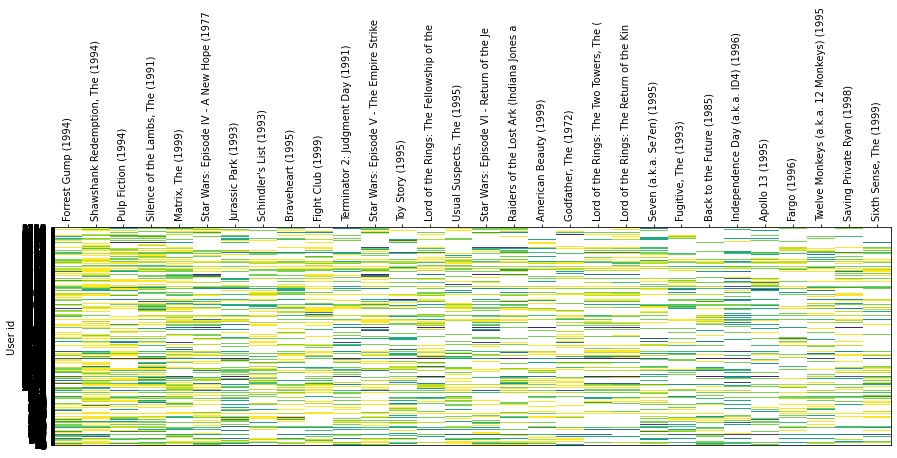

In [115]:
# Define the plotting heatmap function
def draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True):
    
    fig = plt.figure(figsize=(15,4))
    ax = plt.gca()
    
    # Draw heatmap
    heatmap = ax.imshow(most_rated_movies_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')
    if axis_labels:
        ax.set_yticks(np.arange(most_rated_movies_users_selection.shape[0]) , minor=False)
        ax.set_xticks(np.arange(most_rated_movies_users_selection.shape[1]) , minor=False)
        ax.invert_yaxis()
        ax.xaxis.tick_top()
        labels = most_rated_movies_users_selection.columns.str[:40]
        ax.set_xticklabels(labels, minor=False)
        ax.set_yticklabels(most_rated_movies_users_selection.index, minor=False)
        plt.setp(ax.get_xticklabels(), rotation=90)
    else:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    ax.grid(False)
    ax.set_ylabel('User id')
# Separate heatmap from color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
# Color bar
    cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])
plt.show()
# Print the heatmap
draw_movies_heatmap(most_rated_movies_users_selection)

In [124]:
# Pivot the dataset and choose the first 1000 movies
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = get_most_rated_movies(user_movie_ratings, 1000)

MemoryError: Unable to allocate 191. MiB for an array with shape (24999486,) and data type int64